<a href="https://colab.research.google.com/github/sarmishtahari/DS/blob/master/16-07-2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Mount the Gdrive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
!ls 'My Drive/Summer Internship'

09-07-2020.ipynb  20-06-2020.ipynb     Assignment-39.ipynb
10-07-2020.ipynb  all_stocks_5yr.csv   cats_and_dogs_filtered
11-07-2020.ipynb  Assignment-37.ipynb  titanic.csv
16-07-2020.ipynb  Assignment-38.ipynb


In [3]:
# all_stocks_5yr.csv
import pandas as pd
data = pd.read_csv('My Drive/Summer Internship/all_stocks_5yr.csv')
data.shape

(619040, 7)

In [4]:
# Top Five rows
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [6]:
### How many company's data we have here?
data.Name.nunique()

505

In [7]:
## Selecting the data AAL
df = data[data['Name']=='AAL']
df.shape

(1259, 7)

In [8]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [9]:
#select the columns date and close price
df = df[['date','close']]
df

,date,close
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99
...,...,...
1254,2018-02-01,53.88
1255,2018-02-02,52.10
1256,2018-02-05,49.76
1257,2018-02-06,51.18


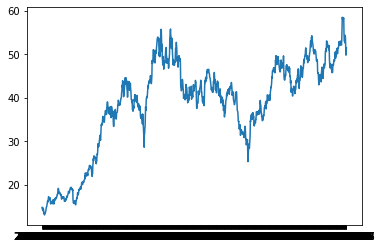

In [10]:
# Line plot
import matplotlib.pyplot as plt
plt.plot(df['date'],df['close'])

In [11]:
df.date[:10]

0    2013-02-08
1    2013-02-11
2    2013-02-12
3    2013-02-13
4    2013-02-14
5    2013-02-15
6    2013-02-19
7    2013-02-20
8    2013-02-21
9    2013-02-22
Name: date, dtype: object

In [12]:
### Missing values in the data
df.isnull().sum()

date     0
close    0
dtype: int64

In [13]:
## Preparing the data
## Features and target
## Input and output
## last 7 days data as input
## X -- [[d1-d7],[d9,d15],[d17,23]....]
## y -- [d8,d16,d24,...]
## X = [[d1-d7],[d2-d8],]
## y = [d8,d9]
rows = df.shape[0]//8
X = [] ## input
y = [] ## ouput
for i  in range(df.shape[0]-7-1):   
  X.append(df['close'][i:i+7])# 0 -->[0:7], 1-->[1:8]
  y.append(df['close'][i+7])# 7,8,9
print(X[:2])

[0    14.75
1    14.46
2    14.27
3    14.66
4    13.99
5    14.50
6    14.26
Name: close, dtype: float64, 1    14.46
2    14.27
3    14.66
4    13.99
5    14.50
6    14.26
7    13.33
Name: close, dtype: float64]


In [14]:
import numpy as np
X = np.array(X)

In [15]:
df1  = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,14.75,14.46,14.27,14.66,13.99,14.50,14.26
1,14.46,14.27,14.66,13.99,14.50,14.26,13.33
2,14.27,14.66,13.99,14.50,14.26,13.33,13.37
3,14.66,13.99,14.50,14.26,13.33,13.37,13.57
4,13.99,14.50,14.26,13.33,13.37,13.57,13.02


In [16]:
X

array([[14.75, 14.46, 14.27, ..., 13.99, 14.5 , 14.26],
       [14.46, 14.27, 14.66, ..., 14.5 , 14.26, 13.33],
       [14.27, 14.66, 13.99, ..., 14.26, 13.33, 13.37],
       ...,
       [54.79, 53.05, 53.07, ..., 52.59, 54.32, 53.88],
       [53.05, 53.07, 52.68, ..., 54.32, 53.88, 52.1 ],
       [53.07, 52.68, 52.59, ..., 53.88, 52.1 , 49.76]])

In [17]:
df1['d8'] = y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,14.75,14.46,14.27,14.66,13.99,14.50,14.26,13.33
1,14.46,14.27,14.66,13.99,14.50,14.26,13.33,13.37
2,14.27,14.66,13.99,14.50,14.26,13.33,13.37,13.57
3,14.66,13.99,14.50,14.26,13.33,13.37,13.57,13.02
4,13.99,14.50,14.26,13.33,13.37,13.57,13.02,13.26


In [18]:
df.close[:15]

0     14.75
1     14.46
2     14.27
3     14.66
4     13.99
5     14.50
6     14.26
7     13.33
8     13.37
9     13.57
10    13.02
11    13.26
12    13.41
13    13.43
14    13.61
Name: close, dtype: float64

In [19]:
df1.shape

(1251, 8)

In [20]:
1251 * 0.8

1000.8000000000001

In [21]:
## Train test split
X_train = df1.iloc[0:1000,0:7]
X_test = df1.iloc[1000:,0:7]
y_train =  df1['d8'][:1000]
y_test  = df1['d8'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(251, 7)
(251,)


In [22]:
## Sacling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.107026e-17,1.179057e-16,3.196332e-16,8.437695e-18,-2.058353e-16,6.408207e-16,3.573808e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.119798e+00,-2.125939e+00,-2.132307e+00,-2.138824e+00,-2.145197e+00,-2.151939e+00,-2.158392e+00
25%,-5.582080e-01,-5.486430e-01,-5.493180e-01,-5.516601e-01,-5.450605e-01,-5.350756e-01,-5.332242e-01
50%,2.659776e-01,2.649882e-01,2.640589e-01,2.640761e-01,2.641178e-01,2.631759e-01,2.621305e-01
75%,6.620601e-01,6.644832e-01,6.649275e-01,6.633158e-01,6.633343e-01,6.668651e-01,6.666995e-01
max,1.847059e+00,1.847165e+00,1.847513e+00,1.847976e+00,1.848369e+00,1.848914e+00,1.849089e+00


In [23]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='mse')

In [25]:
X_test.shape

(251, 7)

In [26]:
# number of records , time steps,Features
X_train_sc = X_train_sc.values.reshape(1000,7,1)
X_test_sc = X_test_sc.values.reshape(251,7,1)

In [ ]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 1s 1ms/step - loss: 1001.8583 - val_loss: 538.8203
Epoch 2/100
1000/1000 [==============================] - 1s 990us/step - loss: 202.7910 - val_loss: 234.5859
Epoch 3/100
1000/1000 [==============================] - 1s 979us/step - loss: 114.8792 - val_loss: 169.7862
Epoch 4/100
1000/1000 [==============================] - 1s 977us/step - loss: 112.7662 - val_loss: 157.9032
Epoch 5/100
1000/1000 [==============================] - 1s 986us/step - loss: 112.4493 - val_loss: 162.3110
Epoch 6/100
1000/1000 [==============================] - 1s 976us/step - loss: 111.0224 - val_loss: 155.5962
Epoch 7/100
1000/1000 [==============================] - 1s 998us/step - loss: 67.5270 - val_loss: 114.4291
Epoch 8/100
1000/1000 [==============================] - 1s 973us/step - loss: 22.5302 - val_loss: 61.3508
Epoch 9/100
1000/1000 [==============================] - 1s 964us/step - loss: 13.011

In [ ]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [ ]:
model.predict(X_test_sc)

In [ ]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

In [ ]:
X_test_sc[0].reshape(1,7,1)

In [ ]:
model.predict(X_test_sc[0].reshape(1,7,1))

In [ ]:
y_test[1000]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 256 cels
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()

In [ ]:
model2.compile(optimizer='adam',loss='mse')

In [ ]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

In [ ]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

## Get the data
## what is the target
## Take the target and observe downtrend or uptrend
## Craete input(features) and ouputs(target)
## Train_test_split
## Apply scaling if it required
## Reshape the inputs
## Create a Model
## Compile the model with the proper optimizer and loss
## Metrics =['mse','mae']
## Evaluate the model with test data
## compare the results
## Check for overfitting and underfitting
## If It is an overfitted model apply dropout. or check another model
## Check raw data
